In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)
from sklearn.preprocessing import StandardScaler

import lightgbm as lgb
from lightgbm import plot_tree

from sklearn.model_selection import StratifiedKFold
RANDOM_STATE = 42

In [43]:
df = pd.read_csv('encoded_categorical_features.csv')

In [44]:
df.shape

(2927, 117)

In [45]:
df.dtypes.value_counts()

int64      62
bool       38
float64    17
Name: count, dtype: int64

We will be working with the version of the df where all missing values where handled and all categorical features where converted to numerical ones.

In [46]:
df['SalePrice_binned'] = pd.qcut(df['SalePrice'], q=5, labels=False)
df['SalePrice_binned'].value_counts()

SalePrice_binned
0    595
3    593
2    581
1    580
4    578
Name: count, dtype: int64

The continous SalesPrice target variable was discretisised into 5 classes.

In [47]:
X = df.drop(columns=['SalePrice', 'SalePrice_binned'])
Y = df['SalePrice_binned']

In [48]:
X.shape, Y.shape

((2927, 116), (2927,))

First, no stratification

In [49]:
'''80-20 unstratified k-fold cross validation with lightgbm classifier'''
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=RANDOM_STATE
)

In [50]:
lgb80_20 = lgb.LGBMClassifier(
    n_estimators=3,           # Number of boosting iterations - good default to start
    learning_rate=0.1,          # Controls how much we adjust weights - 0.1 is a good default
    max_depth=3,               # No limit on tree depth for better accuracy
    num_leaves=31,              # Maximum number of leaves in one tree
    min_child_samples=20,       # Minimum samples per leaf to prevent overfitting
    colsample_bytree=0.8,       # Fraction of features used per tree - helps prevent overfitting
    subsample=0.8,              # Fraction of samples used for training each tree
    random_state=RANDOM_STATE
)

In [51]:
lgb80_20.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.8, max_depth=3, n_estimators=3,
               random_state=42, subsample=0.8)

In [52]:
y_pred80_20 = lgb80_20.predict(X_test)
y_pred80_20_proba = lgb80_20.predict_proba(X_test)
y_pred80_20
y_pred80_20_proba

array([[0.13725017, 0.13270014, 0.13740723, 0.18119891, 0.41144354],
       [0.21690384, 0.27812194, 0.19169431, 0.15693213, 0.15634777],
       [0.15321248, 0.14813328, 0.24759137, 0.29824207, 0.1528208 ],
       ...,
       [0.14253981, 0.13781442, 0.14270292, 0.14964222, 0.42730062],
       [0.16203821, 0.15666642, 0.19767879, 0.27259133, 0.21102526],
       [0.24759525, 0.25465319, 0.21090715, 0.14368974, 0.14315468]],
      shape=(586, 5))

In [53]:
acc = accuracy_score(y_test, y_pred80_20)
print(f'Accuracy: {acc:.4f}')

print('Classification Report:\n', classification_report(y_test, y_pred80_20))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred80_20))


Accuracy: 0.6775
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75       120
           1       0.51      0.61      0.56       121
           2       0.52      0.38      0.44       114
           3       0.70      0.76      0.73       120
           4       0.88      0.90      0.89       111

    accuracy                           0.68       586
   macro avg       0.68      0.68      0.67       586
weighted avg       0.67      0.68      0.67       586


Confusion Matrix:
 [[ 89  27   3   0   1]
 [ 22  74  21   3   1]
 [  4  40  43  27   0]
 [  1   3  14  91  11]
 [  0   0   2   9 100]]


<Figure size 8000x4000 with 0 Axes>

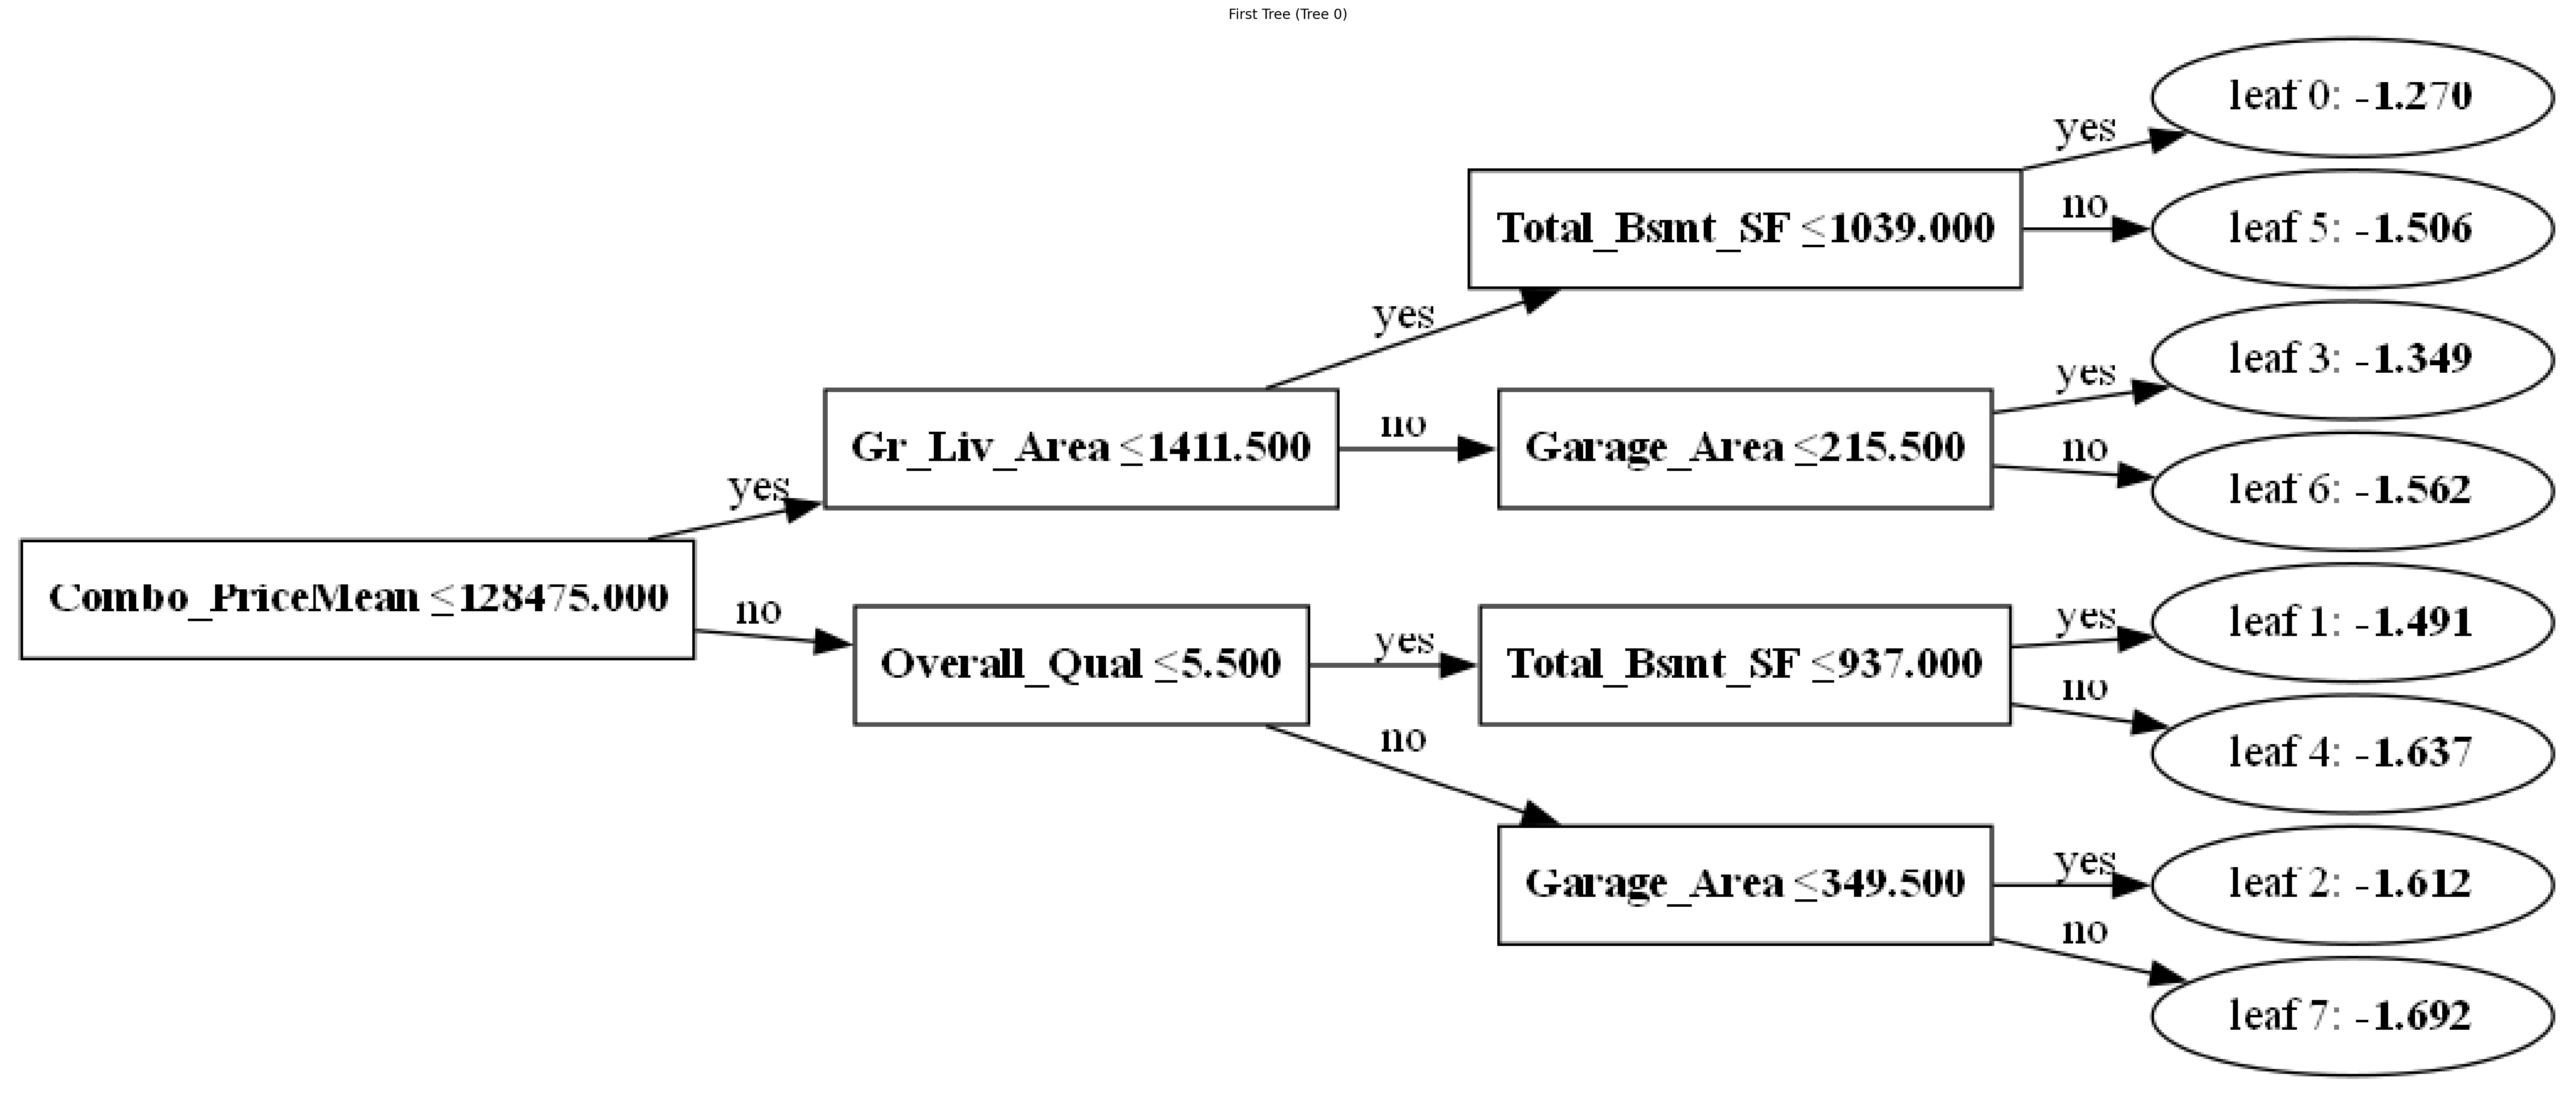

In [54]:
'''Plot of the first and last tree'''
# first tree = index 0
plt.figure(figsize=(40, 20), dpi=200)
plot_tree(lgb80_20, tree_index=0, figsize=(40, 20), dpi=200)
plt.title("First Tree (Tree 0)")
plt.show()


<Figure size 2000x1000 with 0 Axes>

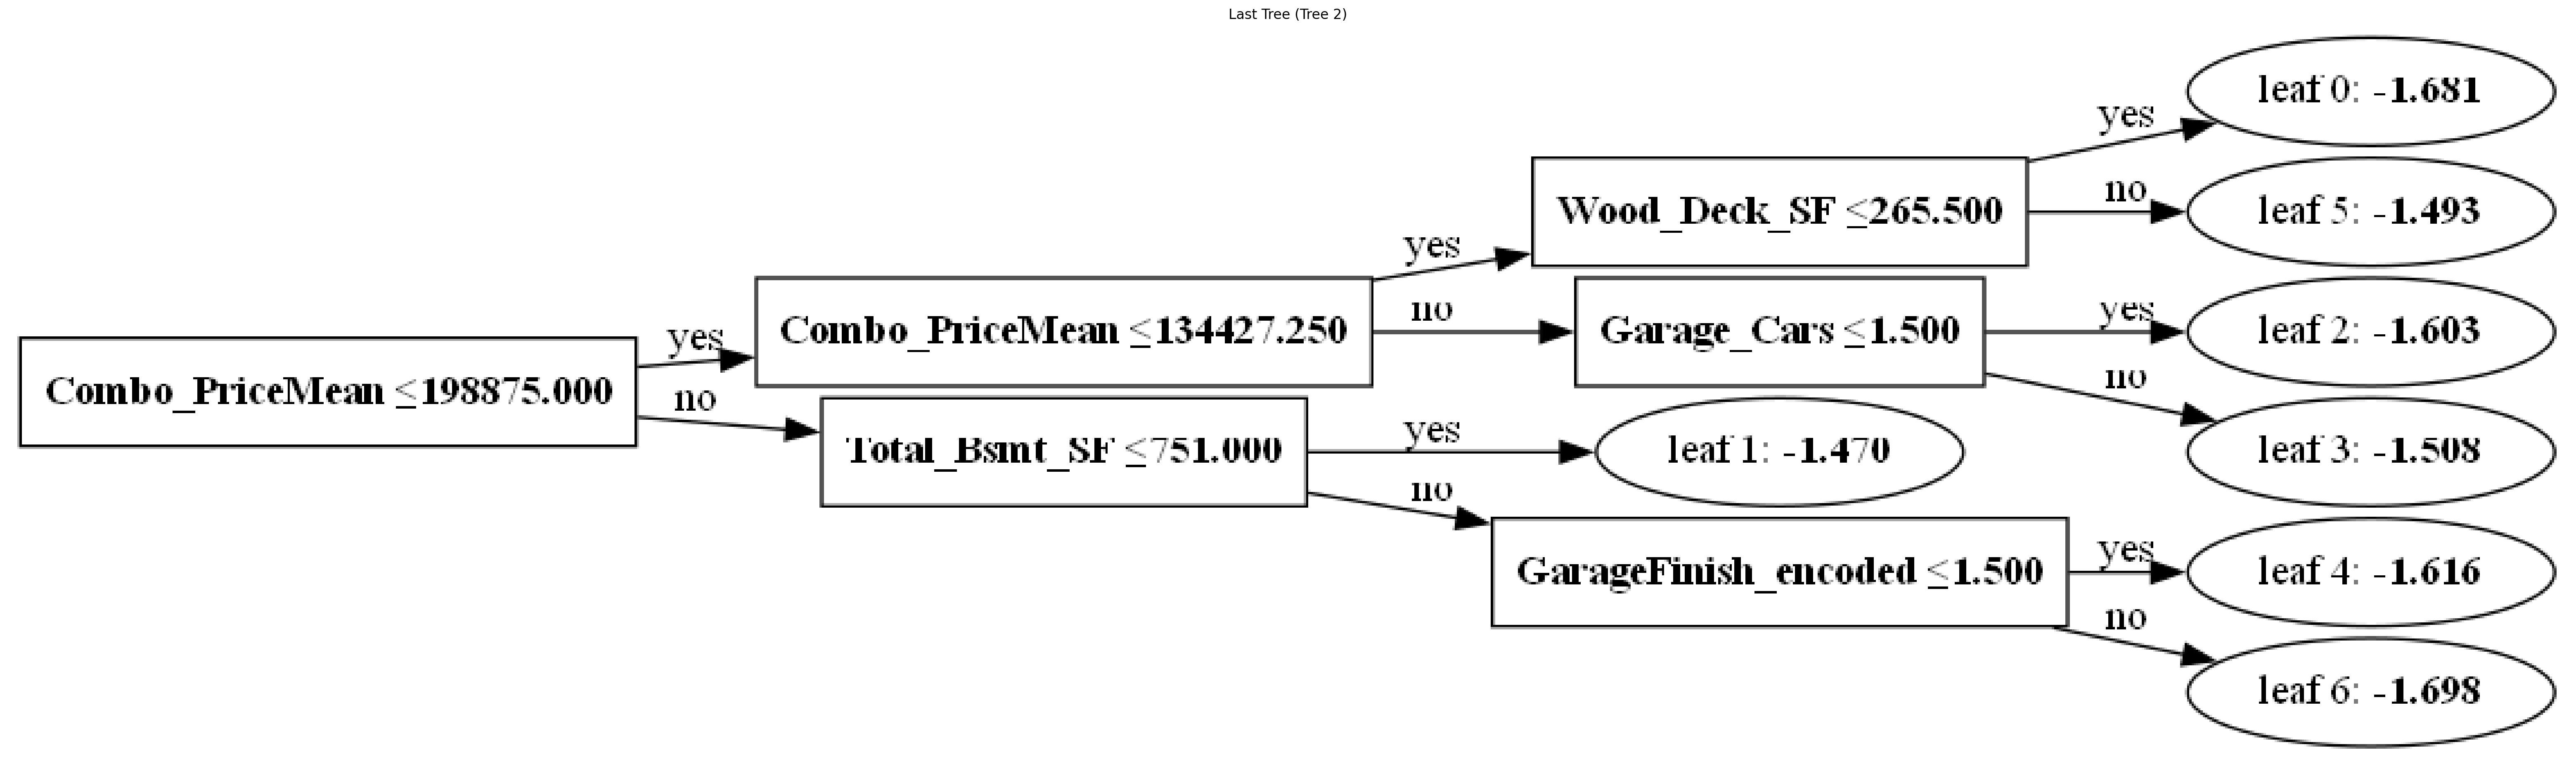

In [55]:
# last tree = index num_estimators - 1
last_tree_idx = lgb80_20.n_estimators - 1
plt.figure(figsize=(20, 10))
plot_tree(lgb80_20, tree_index=last_tree_idx, figsize=(40, 20), dpi=200)
plt.title(f"Last Tree (Tree {last_tree_idx})")
plt.show()

And now the same for 10-90 split.

In [56]:
'''90-10 unstratified k-fold cross validation with lightgbm classifier'''
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, random_state=RANDOM_STATE
)

In [57]:
lgb90_10 = lgb.LGBMClassifier(
    n_estimators=3,           # Number of boosting iterations - good default to start
    learning_rate=0.1,          # Controls how much we adjust weights - 0.1 is a good default
    max_depth=3,               # No limit on tree depth for better accuracy
    num_leaves=31,              # Maximum number of leaves in one tree
    min_child_samples=20,       # Minimum samples per leaf to prevent overfitting
    colsample_bytree=0.8,       # Fraction of features used per tree - helps prevent overfitting
    subsample=0.8,              # Fraction of samples used for training each tree
    random_state=RANDOM_STATE
)

In [58]:
lgb90_10.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.8, max_depth=3, n_estimators=3,
               random_state=42, subsample=0.8)

In [59]:
y_pred90_10 = lgb90_10.predict(X_test)
y_pred90_10_proba = lgb90_10.predict_proba(X_test)  
y_pred90_10
y_pred90_10_proba

array([[0.13916042, 0.13210328, 0.13771495, 0.18170522, 0.40931613],
       [0.24823787, 0.27797472, 0.16426137, 0.15492651, 0.15459952],
       [0.15398986, 0.14618069, 0.25341921, 0.29481362, 0.15159661],
       ...,
       [0.14185088, 0.1346573 , 0.14037746, 0.2113545 , 0.37175986],
       [0.15398986, 0.14618069, 0.25341921, 0.29481362, 0.15159661],
       [0.29290222, 0.23671078, 0.18466521, 0.14301182, 0.14270997]],
      shape=(293, 5))

In [60]:
acc = accuracy_score(y_test, y_pred90_10)
print(f'Accuracy: {acc:.4f}')

print('Classification Report:\n', classification_report(y_test, y_pred90_10))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred90_10))


Accuracy: 0.6724
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.85      0.76        54
           1       0.60      0.55      0.57        66
           2       0.45      0.37      0.41        54
           3       0.69      0.77      0.73        64
           4       0.90      0.84      0.87        55

    accuracy                           0.67       293
   macro avg       0.67      0.67      0.67       293
weighted avg       0.67      0.67      0.67       293


Confusion Matrix:
 [[46  7  1  0  0]
 [15 36 14  1  0]
 [ 6 15 20 13  0]
 [ 0  2  8 49  5]
 [ 0  0  1  8 46]]


<Figure size 8000x4000 with 0 Axes>

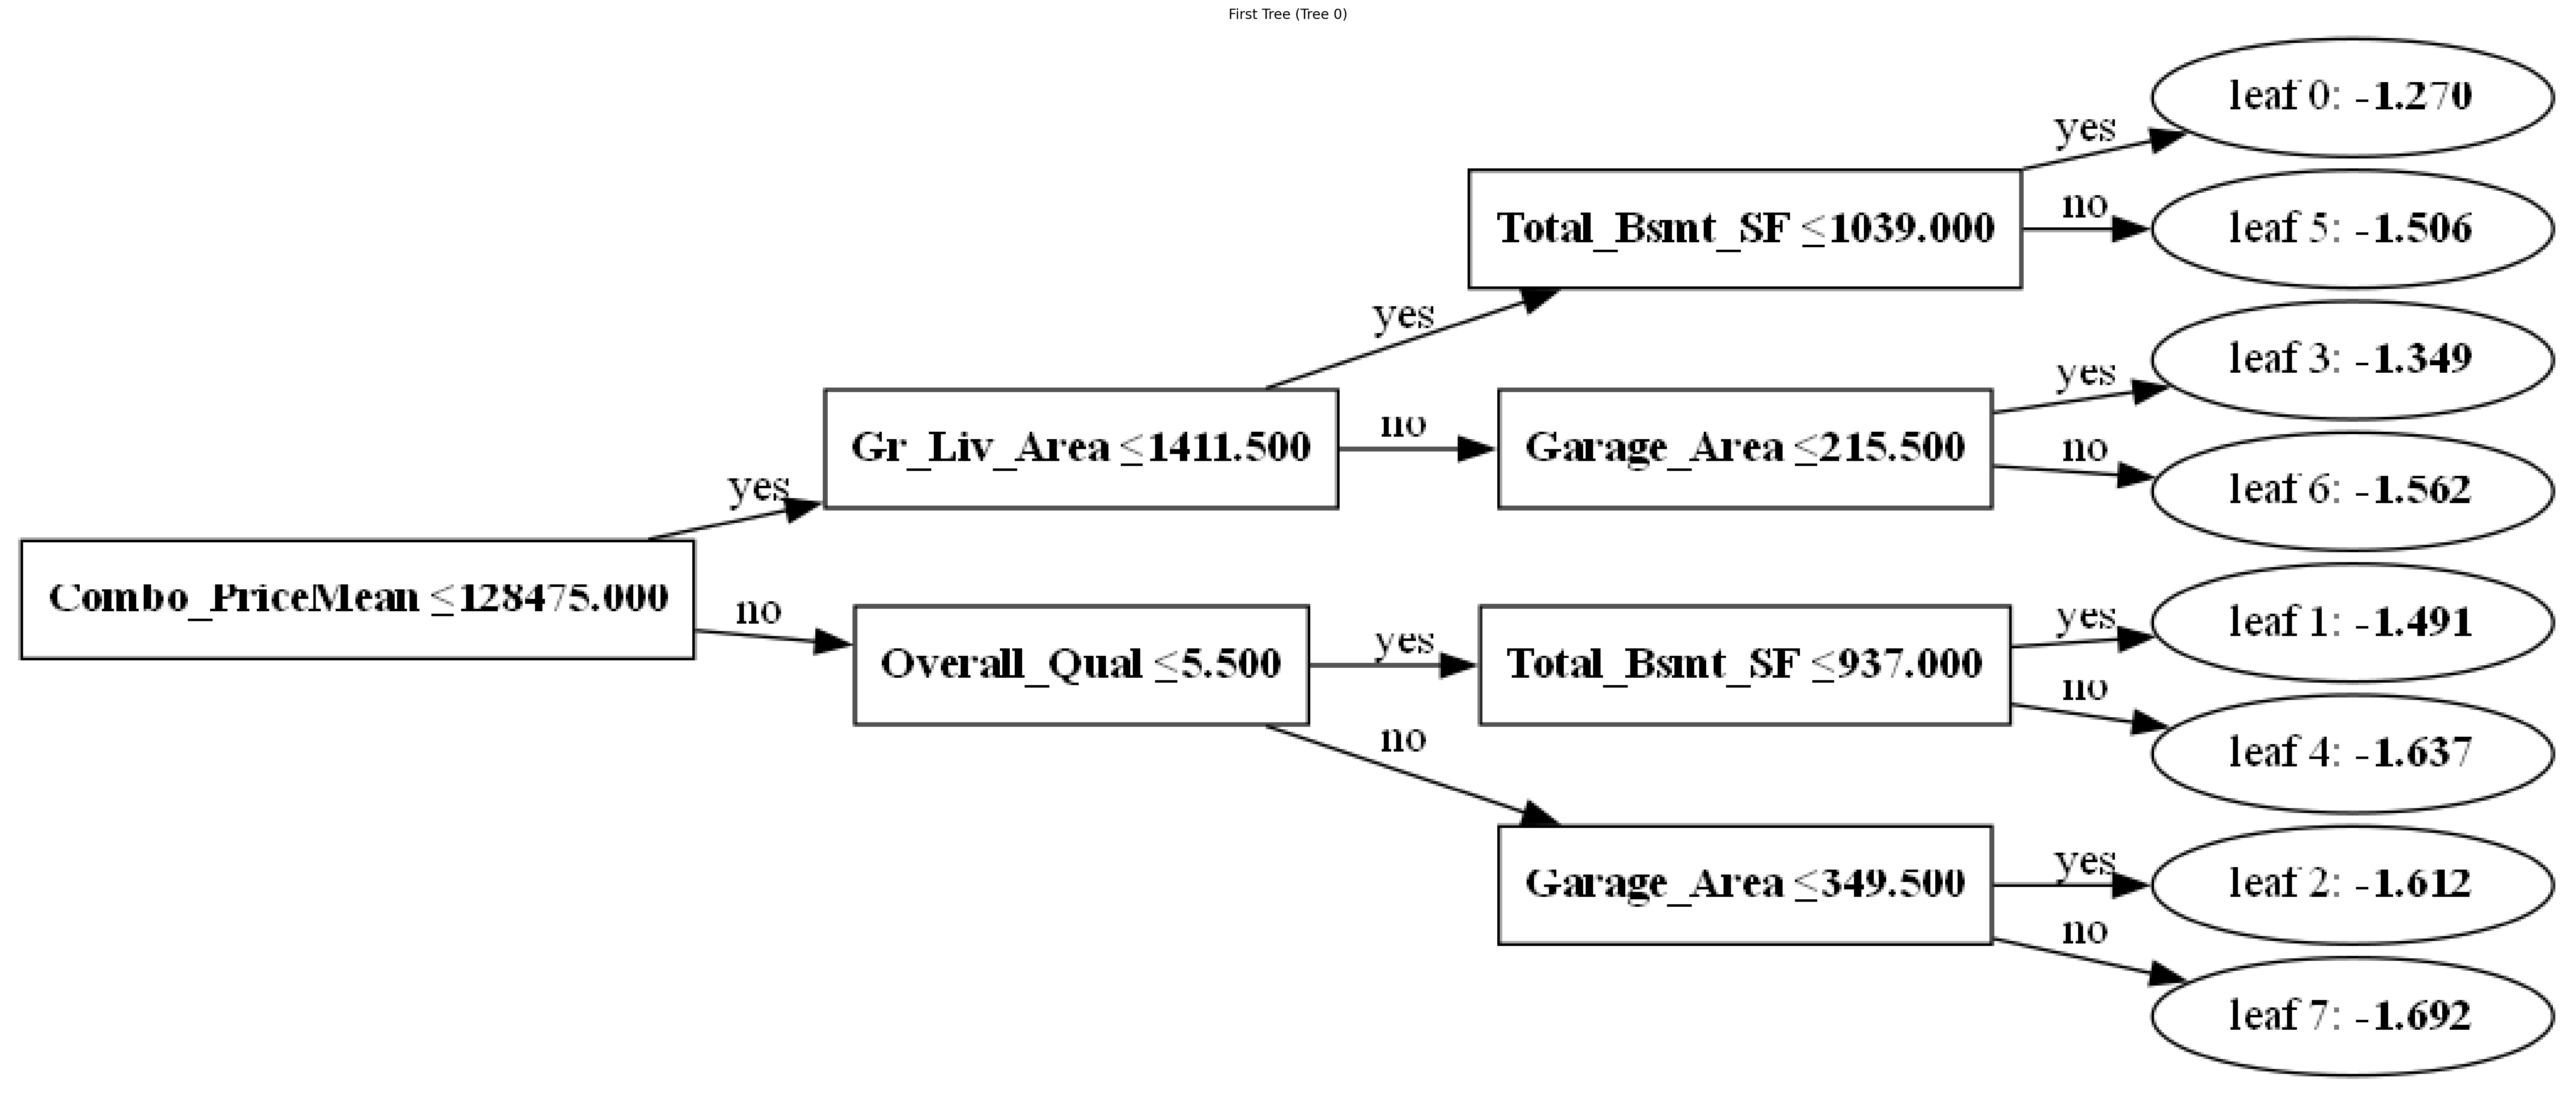

In [61]:
'''Plot of the first and last tree'''
# first tree = index 0
plt.figure(figsize=(40, 20), dpi=200)
plot_tree(lgb80_20, tree_index=0, figsize=(40, 20), dpi=200)
plt.title("First Tree (Tree 0)")
plt.show()


<Figure size 2000x1000 with 0 Axes>

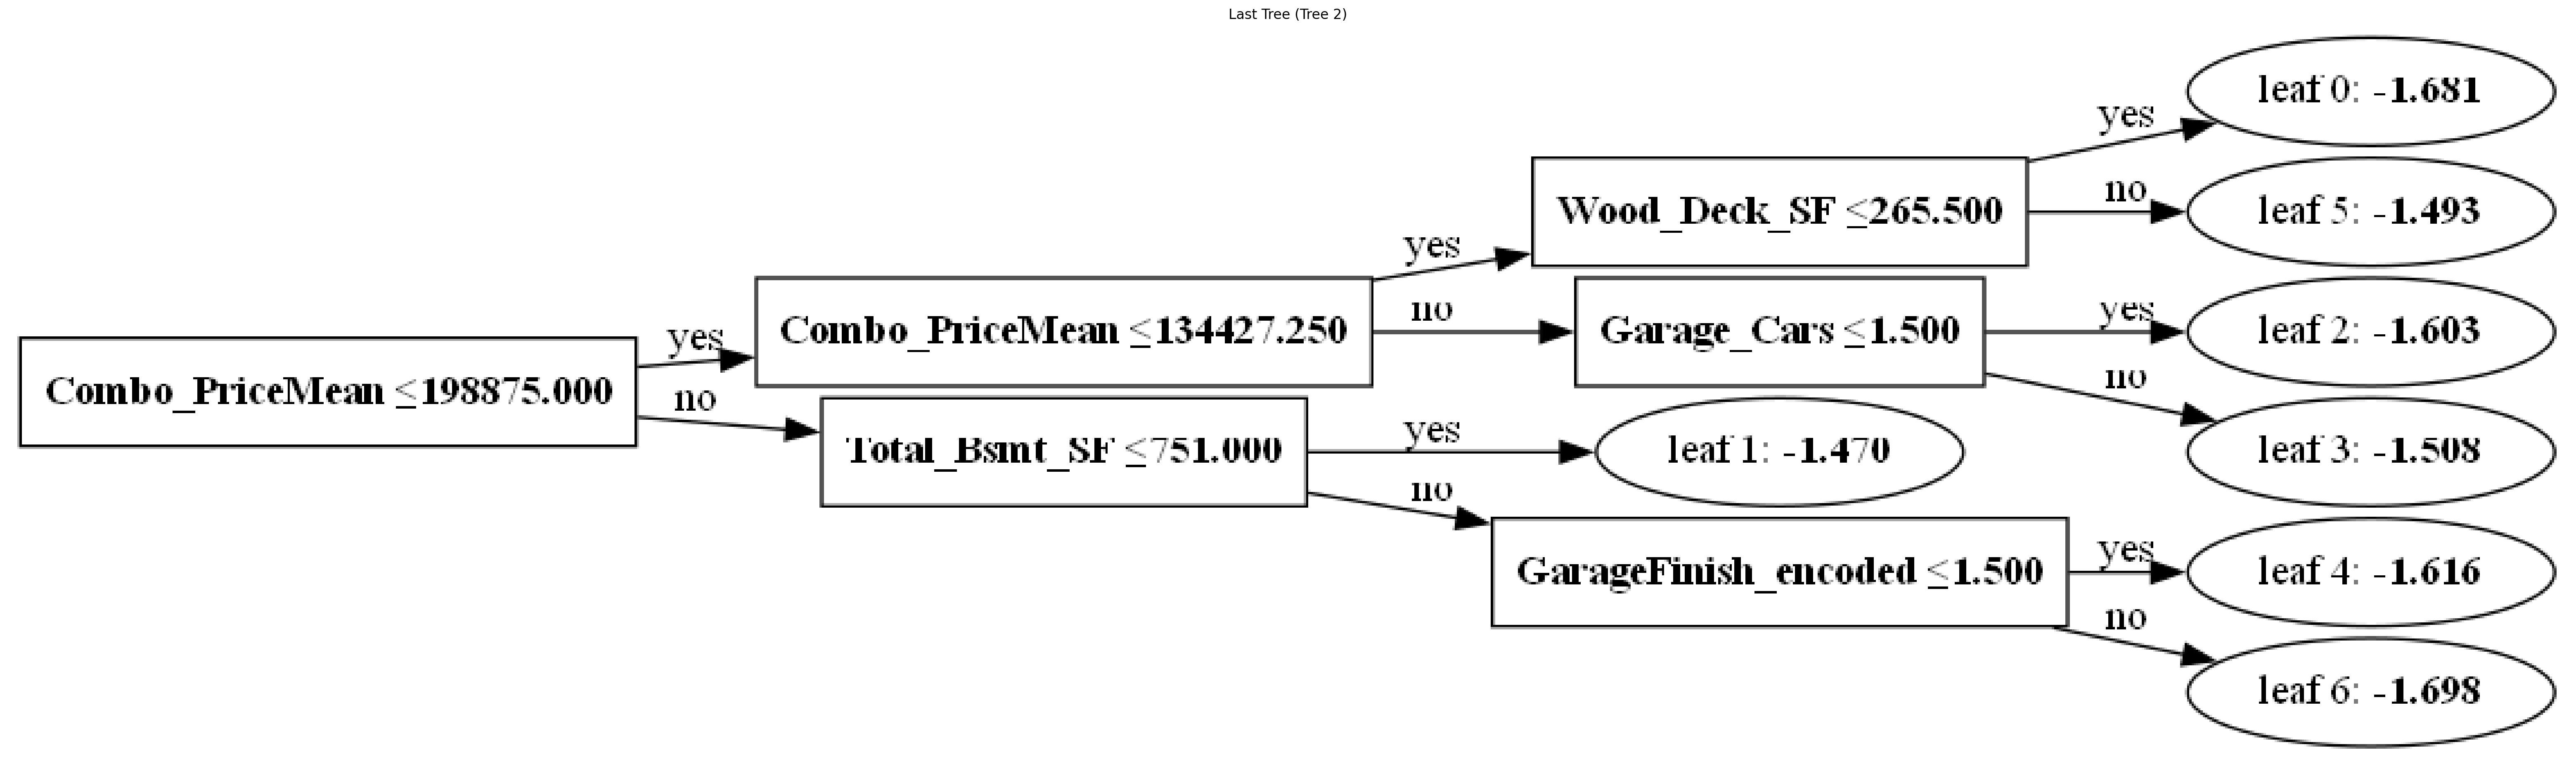

In [62]:
last_tree_idx = lgb90_10.n_estimators - 1
plt.figure(figsize=(20, 10))
plot_tree(lgb80_20, tree_index=last_tree_idx, figsize=(40, 20), dpi=200)
plt.title(f"Last Tree (Tree {last_tree_idx})")
plt.show()


Now using stratified k-fold.First with a 80-20 split.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

In [64]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

In [65]:
# To store accuracy for each fold
accuracy_scores_lgb_80_20 = []

# Loop over folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Define LightGBM model (multiclass setup)
    lgb_80_20_strat = lgb.LGBMClassifier(
        n_estimators=50,         # number of boosting rounds
        learning_rate=1,        # step size shrinkage
        max_depth=5,             # no explicit limit on tree depth
        num_leaves=31,            # controls tree complexity
        objective='multiclass',   # multiclass classification objective
        num_class=5,              # number of classes in target
        random_state=RANDOM_STATE,
        verbose=-1
    )

    # Fit model on training fold
    lgb_80_20_strat.fit(X_tr, y_tr, callbacks=[lgb.log_evaluation(0)])

    # Predict on validation fold
    y_pred = lgb_80_20_strat.predict(X_val)

    # Compute accuracy
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores_lgb_80_20.append(accuracy)

    print(f"Fold {fold + 1} Accuracy: {accuracy:.4f}")

# Print overall mean accuracy
print(f"\nMean CV Accuracy (LGB 80/20 Stratified): {np.mean(accuracy_scores_lgb_80_20):.4f}")

Fold 1 Accuracy: 0.7143
Fold 2 Accuracy: 0.6368
Fold 3 Accuracy: 0.6752
Fold 4 Accuracy: 0.7329
Fold 5 Accuracy: 0.7158

Mean CV Accuracy (LGB 80/20 Stratified): 0.6950


In [66]:
best_lgb = lgb.LGBMClassifier(
    n_estimators=50,         # number of boosting rounds
    learning_rate=1,        # step size shrinkage
    max_depth=5,             # no explicit limit on tree depth
    num_leaves=31,            # controls tree complexity
    objective='multiclass',   # multiclass classification objective
    num_class=5,              # number of classes in target
    random_state=RANDOM_STATE
)
best_lgb.fit(X_train, y_train)


LGBMClassifier(learning_rate=1, max_depth=5, n_estimators=50, num_class=5,
               objective='multiclass', random_state=42)

In [67]:
y_pred = best_lgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [68]:
print(f"Final Test Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Final Test Accuracy: 0.7253

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       120
           1       0.60      0.64      0.62       121
           2       0.58      0.55      0.57       114
           3       0.74      0.72      0.73       120
           4       0.91      0.90      0.90       111

    accuracy                           0.73       586
   macro avg       0.73      0.73      0.73       586
weighted avg       0.73      0.73      0.73       586


Confusion Matrix:
 [[ 98  21   1   0   0]
 [ 20  77  22   2   0]
 [  4  29  63  18   0]
 [  0   2  21  87  10]
 [  0   0   1  10 100]]


<Figure size 8000x4000 with 0 Axes>

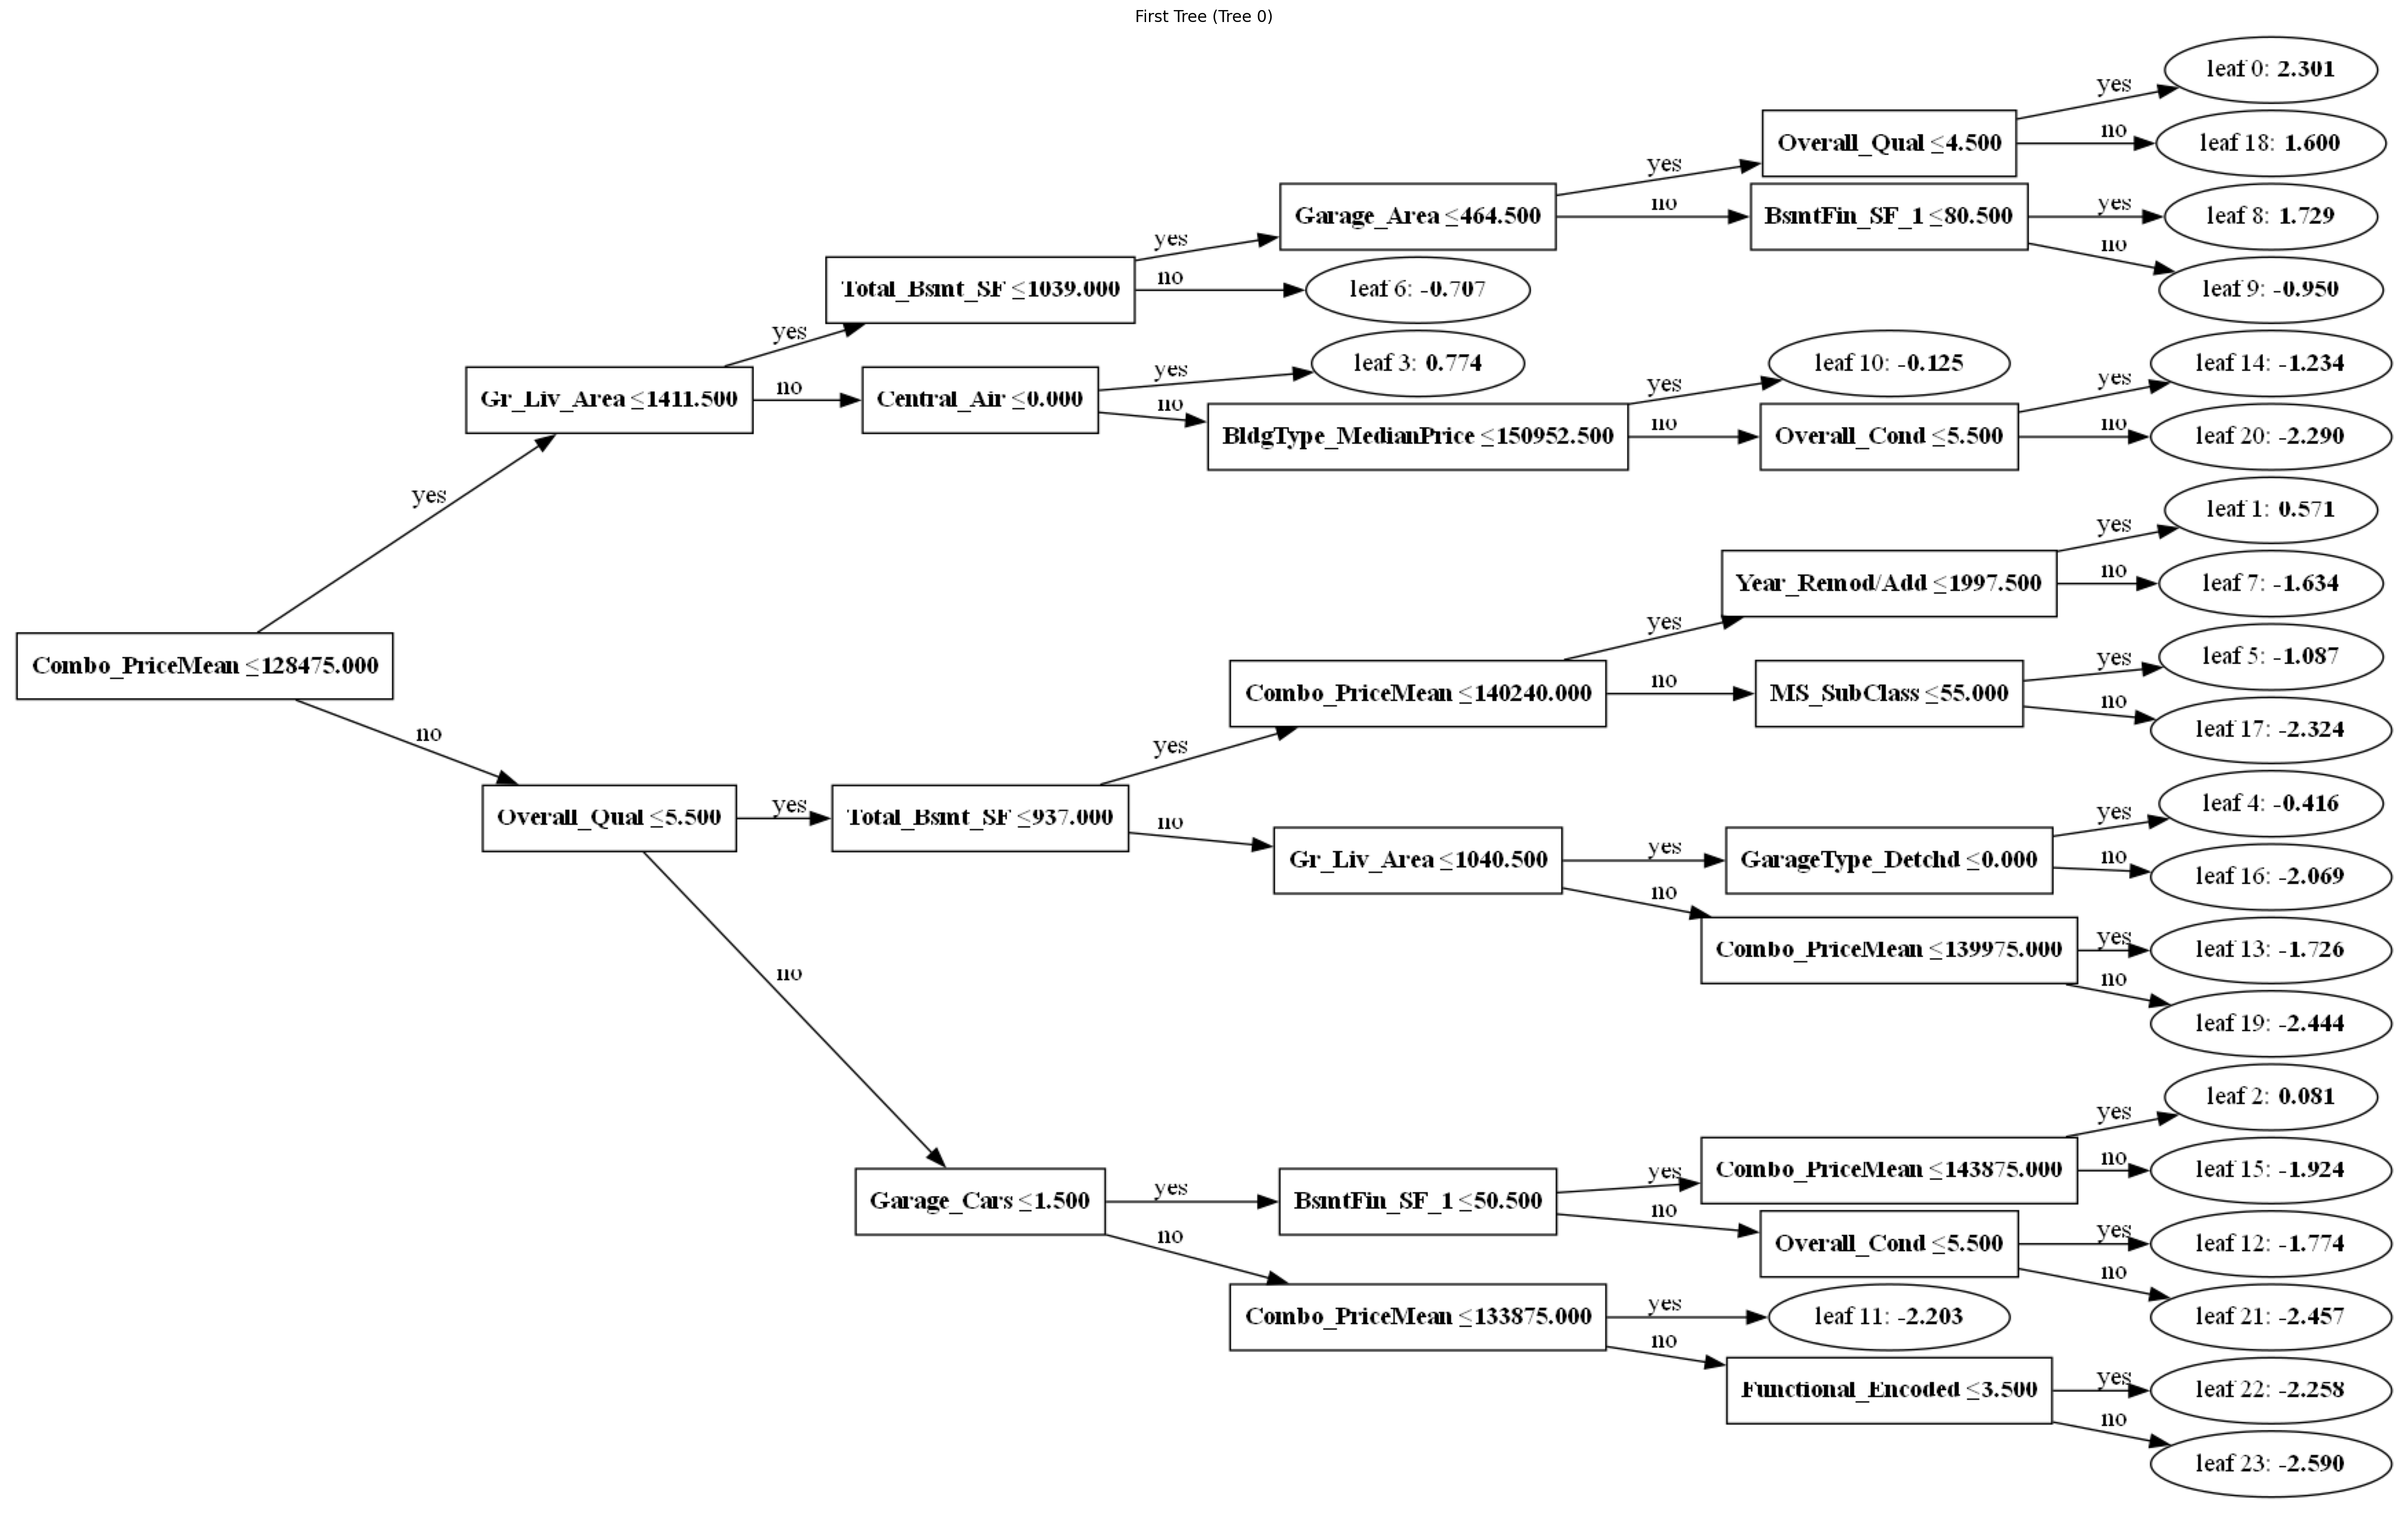

In [69]:
'''Plot of the first and last tree'''
# first tree = index 0
plt.figure(figsize=(40, 20), dpi=200)
plot_tree(best_lgb, tree_index=0, figsize=(40, 20), dpi=200)
plt.title("First Tree (Tree 0)")
plt.show()


<Figure size 2000x1000 with 0 Axes>

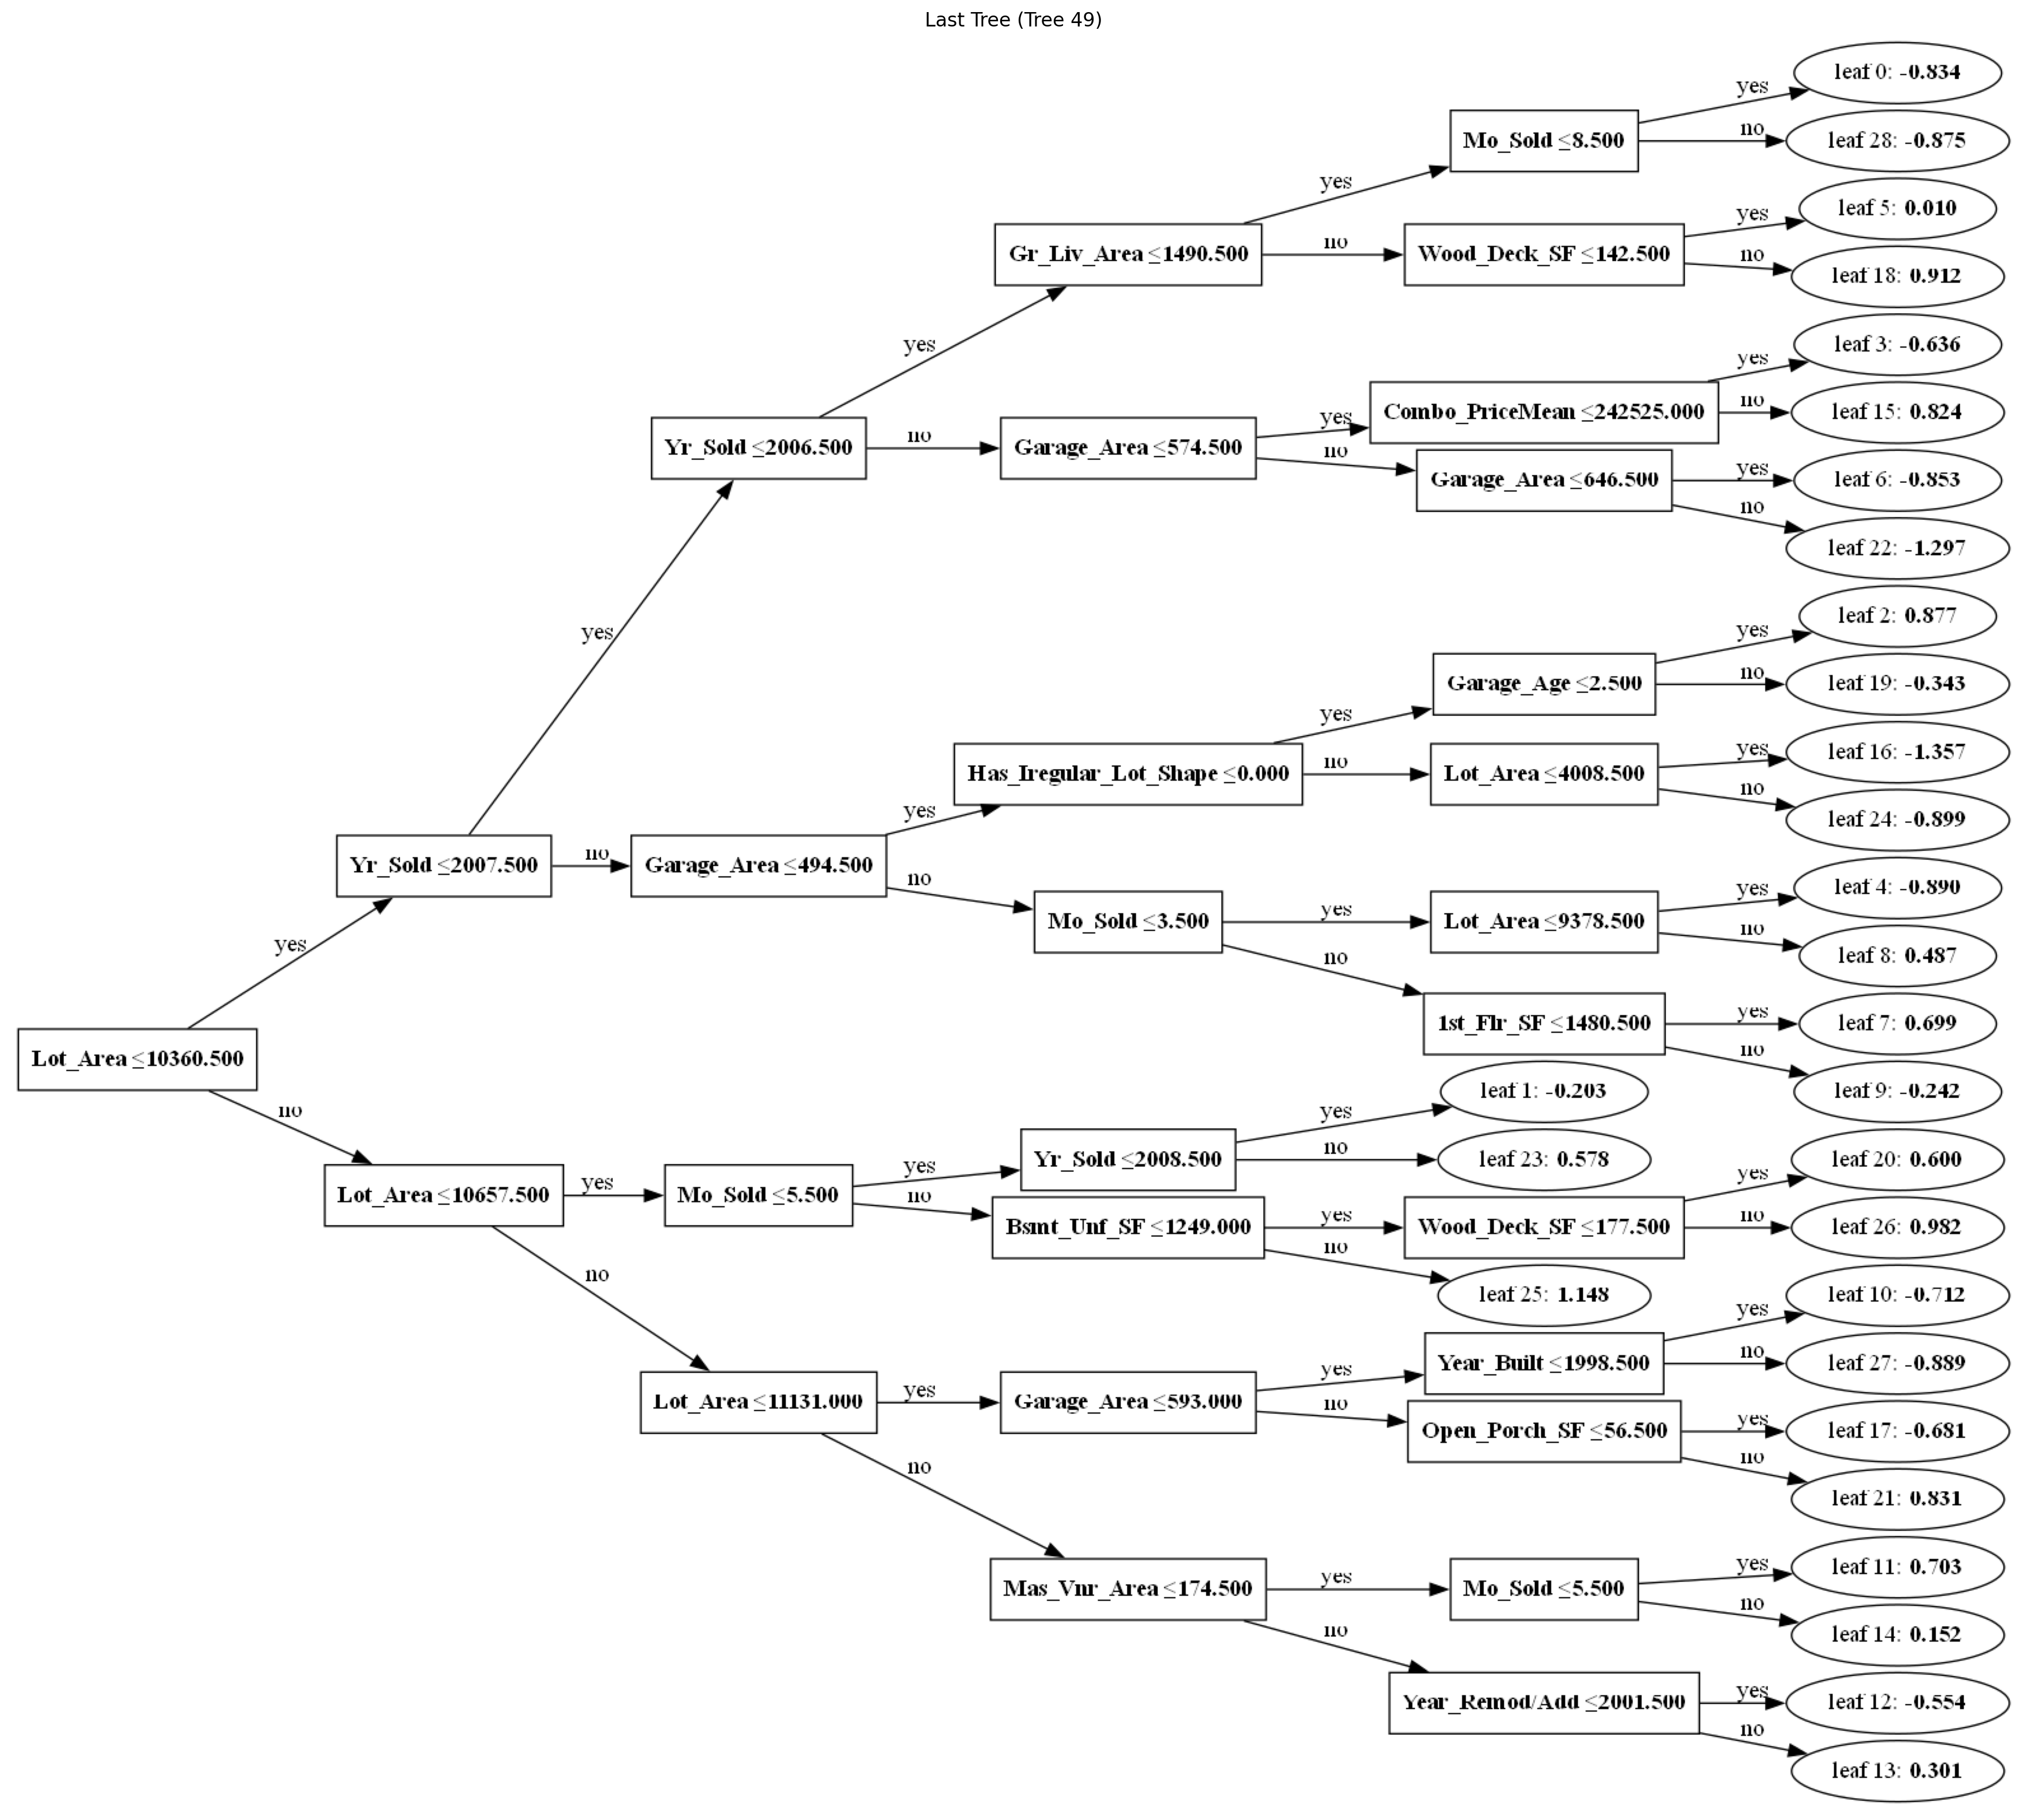

In [70]:
last_tree_idx = best_lgb.n_estimators - 1
plt.figure(figsize=(20, 10))
plot_tree(best_lgb, tree_index=last_tree_idx, figsize=(40, 20), dpi=200)
plt.title(f"Last Tree (Tree {last_tree_idx})")
plt.show()

Now the 90-10 split with stratification.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=RANDOM_STATE)

In [72]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

In [73]:
# To store accuracy for each fold
accuracy_scores_lgb_90_10 = []

# Loop over folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Define LightGBM model (multiclass setup)
    lgb_90_10_strat = lgb.LGBMClassifier(
        n_estimators=50,         # number of boosting rounds
        learning_rate=1,        # step size shrinkage
        max_depth=5,             # no explicit limit on tree depth
        num_leaves=31,            # controls tree complexity
        objective='multiclass',   # multiclass classification objective
        num_class=5,              # number of classes in target
        random_state=RANDOM_STATE,
        verbose=-1
    )

    # Fit model on training fold
    lgb_90_10_strat.fit(X_tr, y_tr, callbacks=[lgb.log_evaluation(0)])

    # Predict on validation fold
    y_pred = lgb_90_10_strat.predict(X_val)

    # Compute accuracy
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores_lgb_90_10.append(accuracy)

    print(f"Fold {fold + 1} Accuracy: {accuracy:.4f}")

# Print overall mean accuracy
print(f"\nMean CV Accuracy (LGB 90/10 Stratified): {np.mean(accuracy_scores_lgb_90_10):.4f}")

Fold 1 Accuracy: 0.7386
Fold 2 Accuracy: 0.7424
Fold 3 Accuracy: 0.6856
Fold 4 Accuracy: 0.6705
Fold 5 Accuracy: 0.7224
Fold 6 Accuracy: 0.7224
Fold 7 Accuracy: 0.7452
Fold 8 Accuracy: 0.2167
Fold 9 Accuracy: 0.7110
Fold 10 Accuracy: 0.6844

Mean CV Accuracy (LGB 90/10 Stratified): 0.6639


In [74]:
best_lgb2 = lgb.LGBMClassifier(
    n_estimators=50,         # number of boosting rounds
    learning_rate=1,        # step size shrinkage
    max_depth=5,             # no explicit limit on tree depth
    num_leaves=31,            # controls tree complexity
    objective='multiclass',   # multiclass classification objective
    num_class=5,              # number of classes in target
    random_state=RANDOM_STATE
)

In [75]:
best_lgb2.fit(X_train, y_train)

LGBMClassifier(learning_rate=1, max_depth=5, n_estimators=50, num_class=5,
               objective='multiclass', random_state=42)

In [76]:
y_pred = best_lgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [77]:
print(f"Final Test Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Final Test Accuracy: 0.7304

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79        54
           1       0.67      0.64      0.65        66
           2       0.57      0.57      0.57        54
           3       0.77      0.77      0.77        64
           4       0.90      0.85      0.88        55

    accuracy                           0.73       293
   macro avg       0.73      0.73      0.73       293
weighted avg       0.73      0.73      0.73       293


Confusion Matrix:
 [[45  8  1  0  0]
 [12 42 11  1  0]
 [ 3 13 31  7  0]
 [ 0  0 10 49  5]
 [ 0  0  1  7 47]]


<Figure size 8000x4000 with 0 Axes>

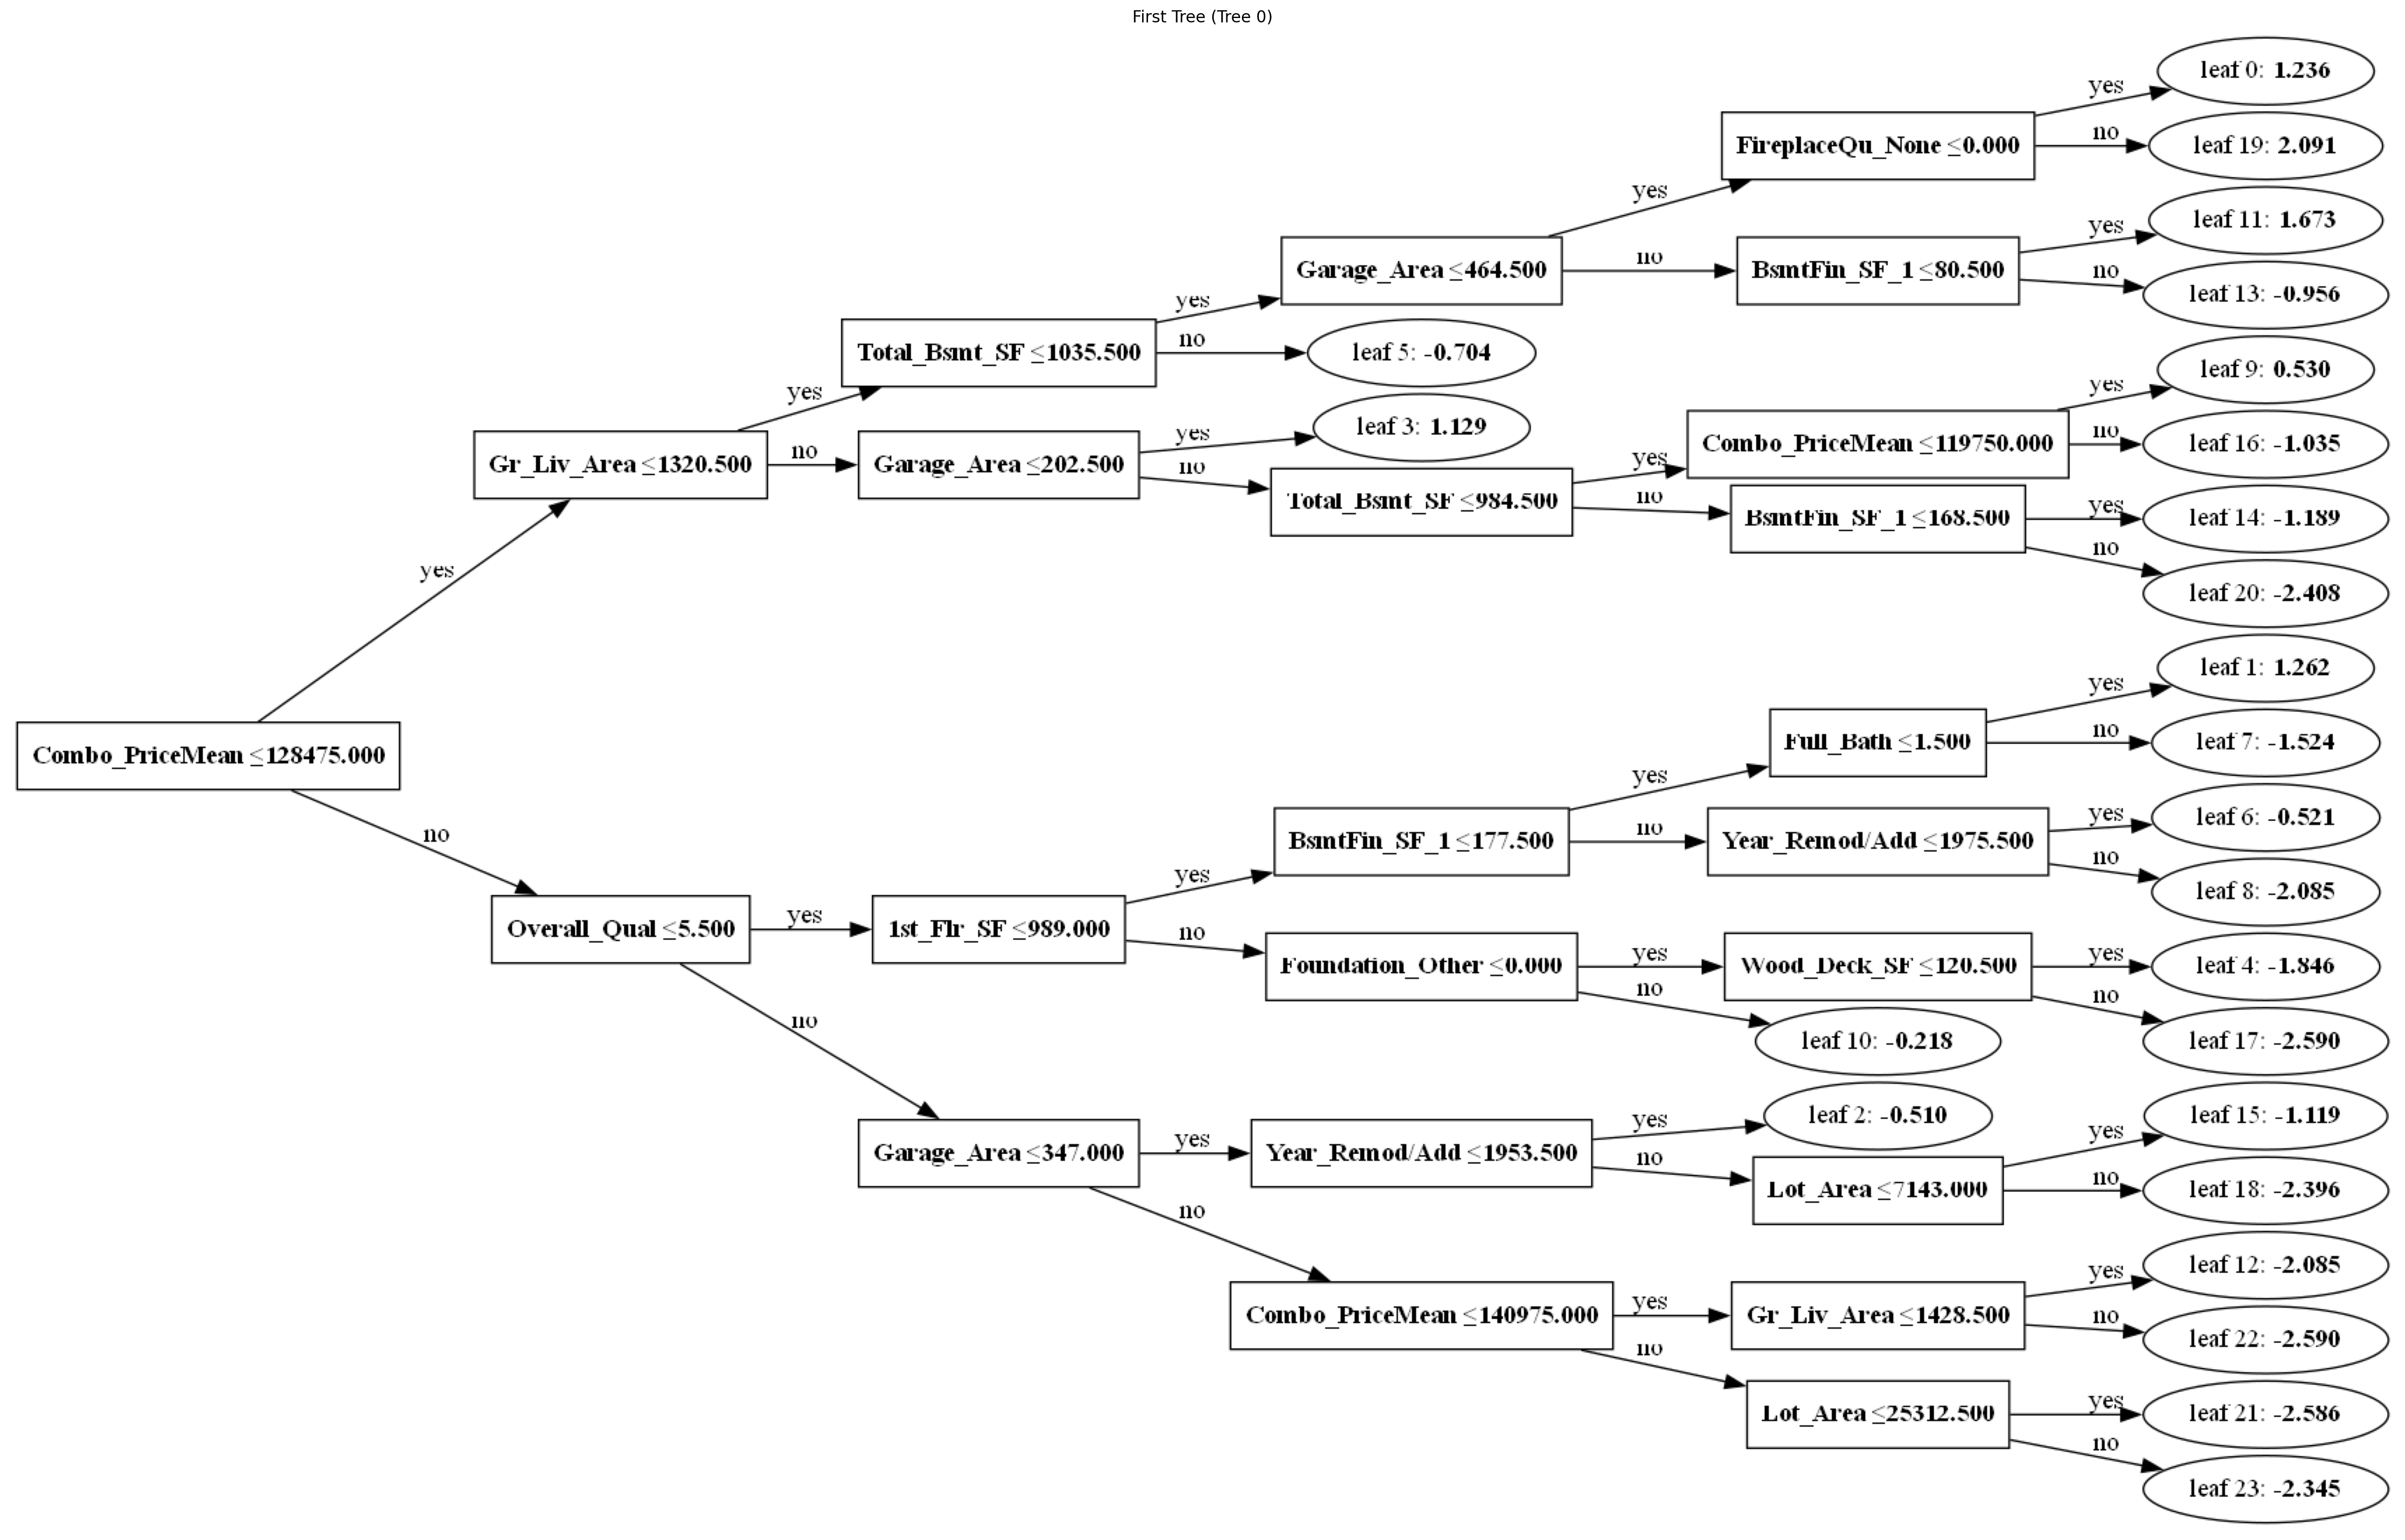

In [78]:
'''Plot of the first and last tree'''
# first tree = index 0
plt.figure(figsize=(40, 20), dpi=200)
plot_tree(best_lgb2, tree_index=0, figsize=(40, 20), dpi=200)
plt.title("First Tree (Tree 0)")
plt.show()

<Figure size 2000x1000 with 0 Axes>

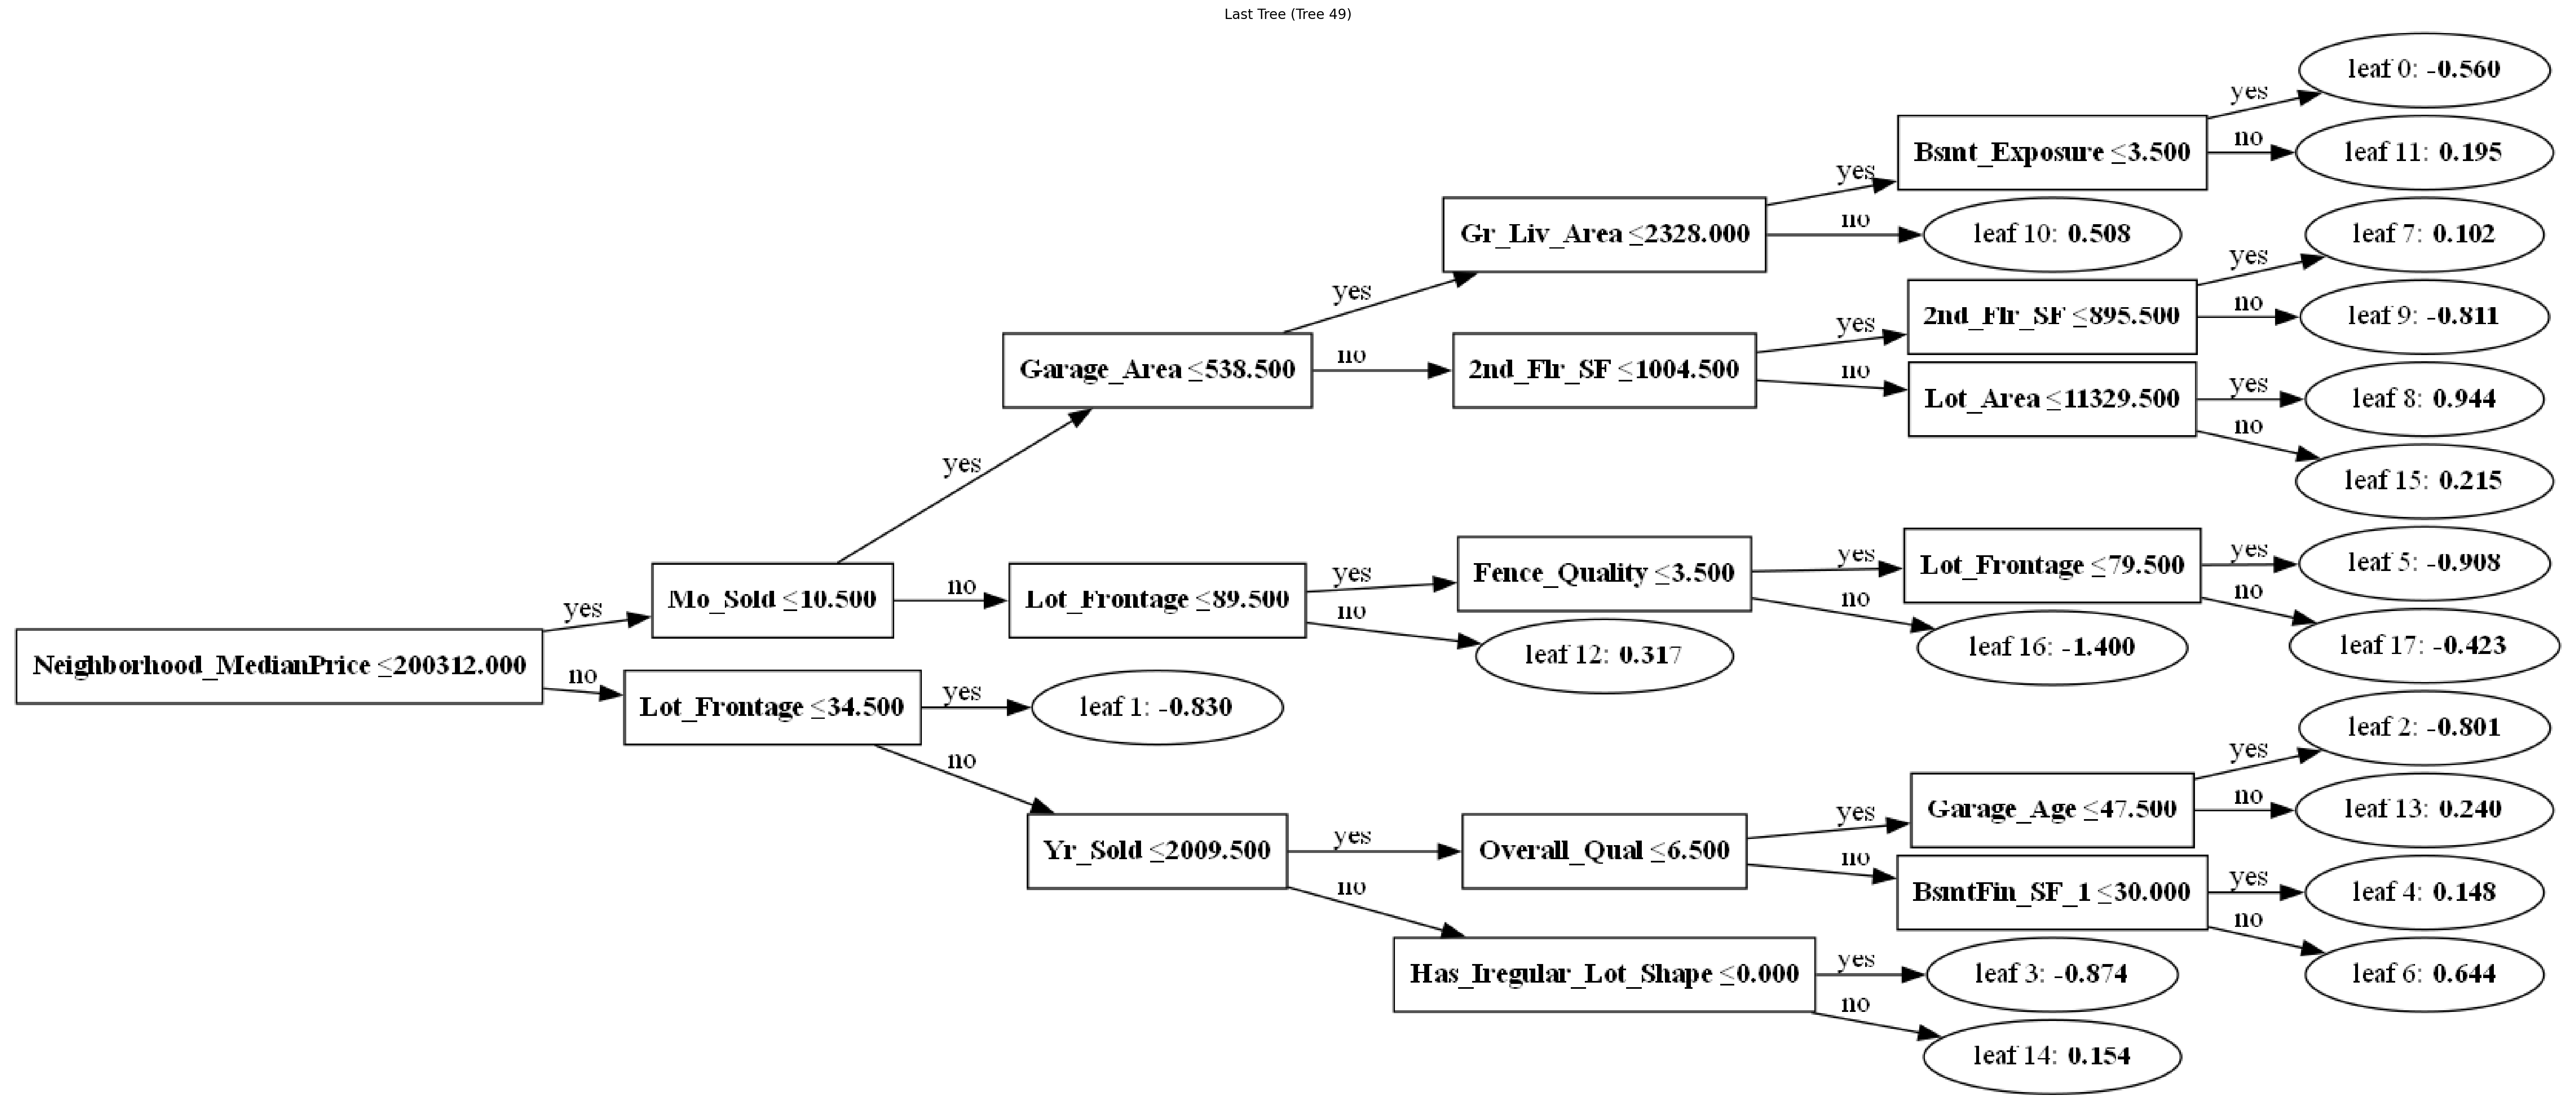

In [79]:
last_tree_idx = best_lgb.n_estimators - 1
plt.figure(figsize=(20, 10))
plot_tree(best_lgb2, tree_index=last_tree_idx, figsize=(40, 20), dpi=200)
plt.title(f"Last Tree (Tree {last_tree_idx})")
plt.show()